In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

ImportError: cannot import name 'mean_squared_error' from 'sklearn.linear_model' (c:\Users\anand\anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)

In [2]:
import numpy as np
dataset = pd.read_csv(r"Salary.csv")


# Clean the dataset
dataset = dataset.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
dataset = dataset.dropna()  # Drop rows with NaN values

In [3]:
dataset

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
dataset = dataset.drop(columns=["Gender", "Education Level", "Job Title"])


In [5]:
dataset

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
370,35.0,8.0,85000.0
371,43.0,19.0,170000.0
372,29.0,2.0,40000.0
373,34.0,7.0,90000.0


In [6]:
X = dataset[["Years of Experience"]]  # Features (independent variable)
y = dataset["Salary"]  # Target (dependent variable)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.metrics import mean_squared_error,r2_score

# Step 4: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 7: Display the coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for 'Years of Experience': {model.coef_[0]:.2f}")


prediction = model.predict([[5]])  # Input must be a 2D array
print(f"Predicted Salary for 5 years of experience: {prediction[0]:.2f}")


Model Evaluation:
Mean Squared Error: 241834883.90
R-squared (R²): 0.90

Model Coefficients:
Intercept: 31521.08
Coefficient for 'Years of Experience': 6822.59
Predicted Salary for 5 years of experience: 65634.03


c:\Users\anand\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
points = {
    'A': [1, 2],
    'B': [1, 3],
    'C': [2, 2],
    'D': [3, 3],
    'E': [2, 3],
    'F': [8, 7],
    'G': [7, 8],
    'H': [9, 8],
    'I': [8, 9],
    'J': [9, 9]
}

# Convert points to a numpy array for easier calculations
data = np.array(list(points.values()))

# Function to compute the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# K-means clustering function
def k_means(data, k=2, max_iter=100):
    # Step 1: Initialize random cluster centers (from the data points)
    centers = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iter):
        # Step 2: Assign points to the nearest cluster center
        labels = []
        for point in data:
            distances = [euclidean_distance(point, center) for center in centers]
            labels.append(np.argmin(distances))  # Assign to the nearest center

        # Step 3: Recompute the cluster centers (mean of the assigned points)
        new_centers = np.array([data[np.array(labels) == i].mean(axis=0) for i in range(k)])

        # Step 4: If centers don't change, stop the loop
        if np.all(centers == new_centers):
            break
        
        centers = new_centers  # Update the centers

    return centers, labels

k = 2
centers, labels = k_means(data, k)

print(centers)
print(labels)


[[8.2 8.2]
 [1.8 2.6]]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


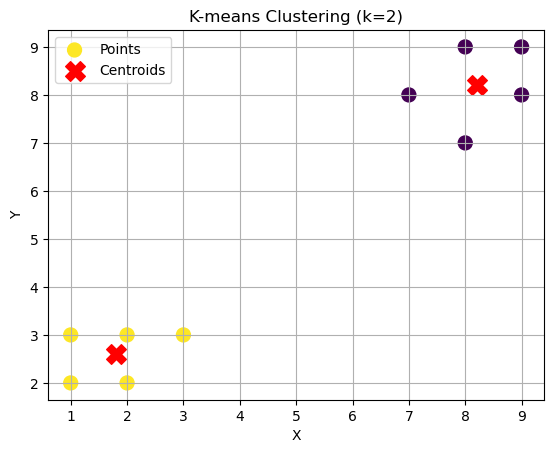

Cluster Centers:
[[8.2 8.2]
 [1.8 2.6]]
Point A is in cluster 2
Point B is in cluster 2
Point C is in cluster 2
Point D is in cluster 2
Point E is in cluster 2
Point F is in cluster 1
Point G is in cluster 1
Point H is in cluster 1
Point I is in cluster 1
Point J is in cluster 1


In [10]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=100, marker='o', label='Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-means Clustering (k=2)")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Print final cluster centers
print("Cluster Centers:")
print(centers)

# Print which points belong to which cluster
for i, point in enumerate(points):
    print(f"Point {point} is in cluster {labels[i] + 1}")

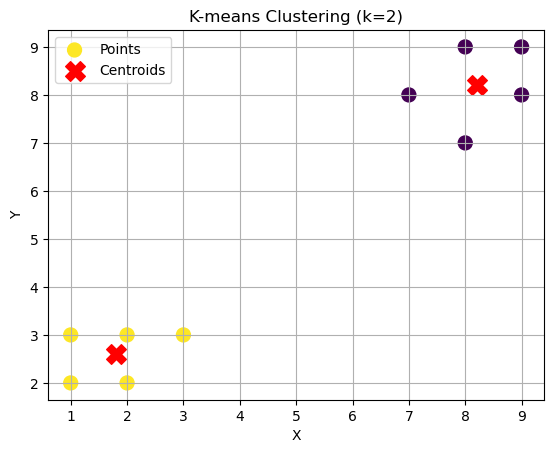

Point A is in cluster 2
Point B is in cluster 2
Point C is in cluster 2
Point D is in cluster 2
Point E is in cluster 2
Point F is in cluster 1
Point G is in cluster 1
Point H is in cluster 1
Point I is in cluster 1
Point J is in cluster 1

Cluster Centers:
[[8.2 8.2]
 [1.8 2.6]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Given points
points = {
    'A': [1, 2],
    'B': [1, 3],
    'C': [2, 2],
    'D': [3, 3],
    'E': [2, 3],
    'F': [8, 7],
    'G': [7, 8],
    'H': [9, 8],
    'I': [8, 9],
    'J': [9, 9]
}

# Convert points dictionary to numpy array
data = np.array(list(points.values()))

# Perform K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)

# Cluster centers
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the points and their clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', s=100, label='Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-means Clustering (k=2)")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Printing the cluster labels and centers
for i, label in enumerate(labels):
    print(f"Point {list(points.keys())[i]} is in cluster {label + 1}")

print("\nCluster Centers:")
print(centers)
